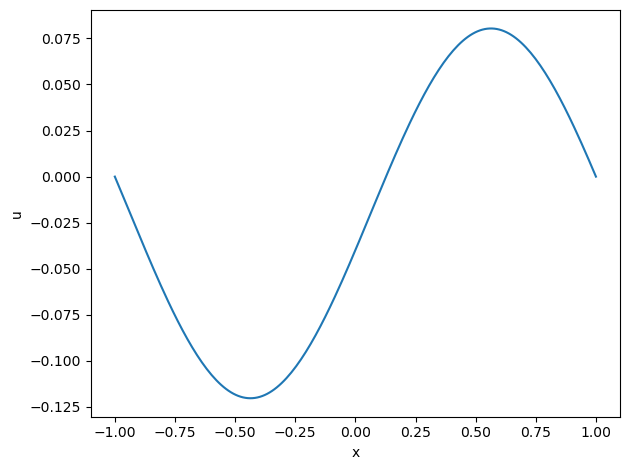

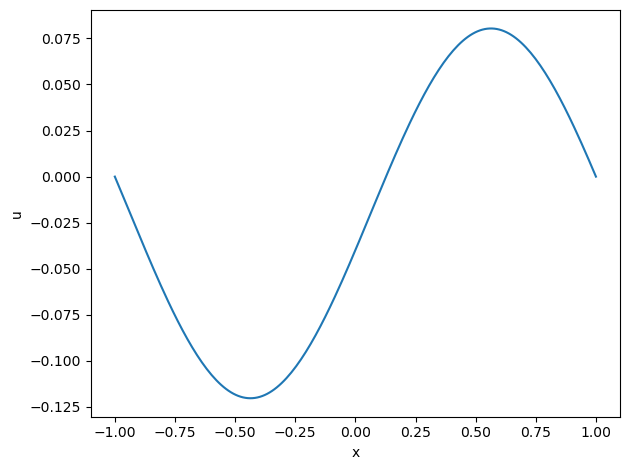

In [1]:
import stochastic_collocation as sc
import matplotlib.pyplot as plt
import numpy as np
import heateqn

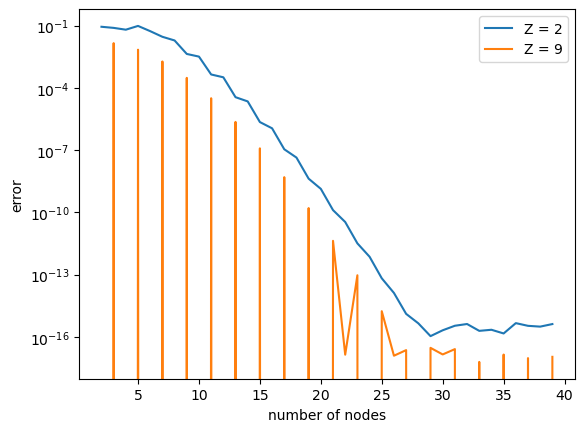

In [2]:
### evaluate the error of approximation against true solution for given Z
Ms = np.arange(2,40)
Z = 2

x, solution = heateqn.heat_eq(Z)

errors = []
for M in Ms:
    _, realization = sc.approx_M(M, np.array([Z]))
    errors.append(np.sqrt(np.mean((realization-solution)**2)))

Z2 = 9
x, solution2 = heateqn.heat_eq(Z2)
errors2 = []
for M in Ms:
    _, realization = sc.approx_M(M, np.array([Z2]))
    errors2.append(np.sqrt(np.mean((realization-solution2)**2)))

# plot
plt.plot(Ms, errors, label = 'Z = '+str(Z))
plt.plot(Ms, errors2, label = 'Z = '+str(Z2))

plt.xlabel('number of nodes')
plt.ylabel('error')
plt.yscale('log')
plt.legend()
plt.savefig('error_convergence.png',dpi = 300)

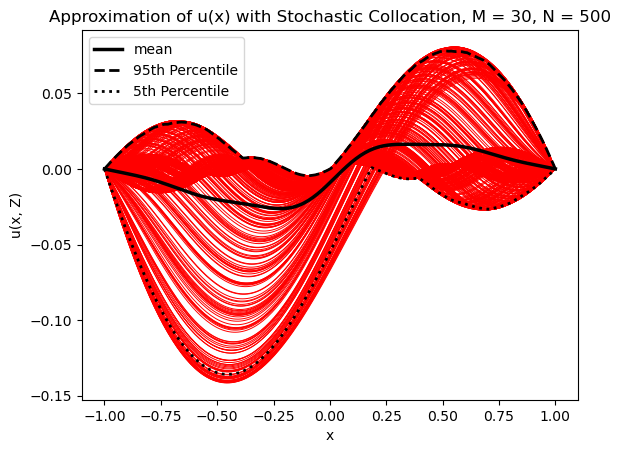

In [3]:
### generate realizations of the approximation.
M = 30
N = 500
zetas_vals = np.random.uniform(2, 16, N)
_, realisations = sc.approx_M(30, zetas_vals)

for realisation in realisations:
    plt.plot(x, realisation, linewidth = 0.7, color='red')

mean_approx = np.mean(realisations, axis=0)
stdev_approx = np.std(realisations, axis = 0)
percentiles_5 = np.percentile(realisations, 5, axis=0)
percentiles_95 = np.percentile(realisations, 95, axis=0)
plt.xlabel("x")
plt.plot(x, mean_approx, linewidth = 2.5, color='black', label = "mean")
plt.plot(x, percentiles_95, linewidth = 2, color = 'black', ls = '--', label = '95th Percentile')
plt.plot(x, percentiles_5, linewidth = 2, color = 'black', ls = ':', label = '5th Percentile')
#plt.fill_between(x, percentiles_5, percentiles_95, color='gray', alpha=0.4, label='5th-95th Percentiles')
plt.legend()
plt.ylabel("u(x, Z)")
plt.title("Approximation of u(x) with Stochastic Collocation, M = "+str(M)+", N = "+str(N) )
plt.savefig('approx.png',dpi = 300)

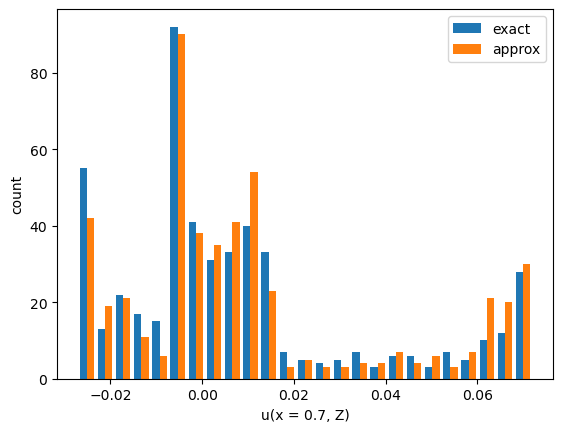

In [4]:
# Find the index in the 'x' array that is closest to x = 0.7
x_target = 0.7
index_x_07 = np.abs(x - x_target).argmin()

# Access the values of 'u' at x = 0.7 for all realizations
u_vals_07 = [realisation[index_x_07] for realisation in realisations]

# plt.hist(u_vals_07, bins=25, label = 'approx', alpha = 1,histtype='bar')


realisations_exact = []
for i in range(N):
    z = np.random.uniform(2, 16)
    res = heateqn.heat_eq(z)
    realisations_exact.append(res[1])

u_vals_07_exact = [realisation[index_x_07] for realisation in realisations_exact]

plt.hist([u_vals_07_exact, u_vals_07], bins=25, label = ['exact', 'approx'], histtype='bar')
# plt.hist(u_vals_07_exact, bins=25, label = 'approx', alpha = 1, histtype='step')
plt.ylabel('count')
plt.xlabel('u(x = 0.7, Z)')
plt.legend()
plt.savefig('histograms.png',dpi = 300)

In [5]:
### plot change in standard deviation with MC sampling
N = 100_000 # samples
reps = 30
zeta_vals = np.random.uniform(2,16,N*reps)
_, MC_realizations = sc.approx_M(30, zeta_vals)

np.save('MC_realizations', MC_realizations.astype(np.float16))

In [12]:
MC_realizations = np.load('MC_realizations.npy')

In [13]:
# get mean of std
sample_sizes = np.arange(5000,N+1,2500)
means = np.zeros((len(sample_sizes), reps))

for i, size in enumerate(sample_sizes):
    for j in range(reps):
        means[i,j] = np.mean(MC_realizations[j*size:j*size+size])

MC_mean = np.mean(means, axis = 1)
MC_std = np.std(means, axis = 1)

for i, size in enumerate(sample_sizes):
    for j in range(reps):
        plt.scatter(size, means[i,j], marker= '.', color = 'C2', alpha = 0.2 )
plt.fill_between(sample_sizes, MC_mean-MC_std, MC_mean+MC_std, alpha = 0.5, label = 'STD of means')
plt.plot(sample_sizes, MC_mean, label = 'mean of means')

plt.ylabel('MC mean')
plt.xlabel('N samples')
plt.legend()
plt.savefig('MC_convergence.png',dpi = 300)